#EDA

Loading Dataset

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('BIKE DETAILS.csv')
# Display first few rows
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


#EDA - 1

1️⃣ What is the range of selling prices in the dataset?

In [148]:
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
price_range = max_price - min_price
print(f"Range of Selling Price: {price_range} (Min: {min_price}, Max: {max_price})")


Range of Selling Price: 755000 (Min: 5000, Max: 760000)


2️⃣ What is the median selling price for bikes in the dataset?

In [149]:
median_price = df["selling_price"].median()
print(f"Median Selling Price: {median_price}")


Median Selling Price: 45000.0


3️⃣ What is the most common seller type?

In [150]:
most_common_seller = df["seller_type"].mode()[0]
print(f"Most Common Seller Type: {most_common_seller}")


Most Common Seller Type: Individual


4️⃣ How many bikes have driven more than 50,000 km?

In [151]:
high_mileage_bikes = df[df["km_driven"] > 50000].shape[0]
print(f"Bikes driven more than 50,000 km: {high_mileage_bikes}")


Bikes driven more than 50,000 km: 170


5️⃣ What is the average km_driven value for each ownership type?

In [152]:
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()
print(avg_km_per_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6️⃣ What proportion of bikes are from the year 2015 or older?

In [153]:
bikes_2015_older = df[df["year"] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion = bikes_2015_older / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")


Proportion of bikes from 2015 or older: 56.64%


7️⃣ What is the trend of missing values across the dataset?

In [154]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8️⃣ What is the highest ex_showroom_price recorded, and for which bike?

In [155]:
max_ex_price = df["ex_showroom_price"].max()
bike_name = df[df["ex_showroom_price"] == max_ex_price]["name"].values[0]
print(f"Highest Ex-Showroom Price: {max_ex_price} for {bike_name}")


Highest Ex-Showroom Price: 1278000.0 for Harley-Davidson Street Bob


9️⃣ What is the total number of bikes listed by each seller type?

In [156]:
seller_counts = df["seller_type"].value_counts()
print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


🔟 What is the relationship between selling_price and km_driven for first-owner bikes?

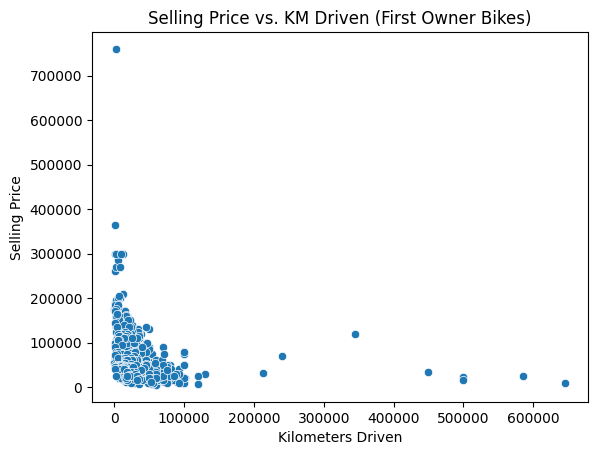

In [157]:
first_owner_bikes = df[df["owner"] == "1st owner"]
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. KM Driven (First Owner Bikes)")
plt.show()


1️⃣1️⃣ Identify and remove outliers in the km_driven column using the IQR method

In [158]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
print(f"Outliers removed: {df.shape[0] - df_cleaned.shape[0]}")


Outliers removed: 39


1️⃣2️⃣ Perform a bivariate analysis to visualize the relationship between year and selling_price

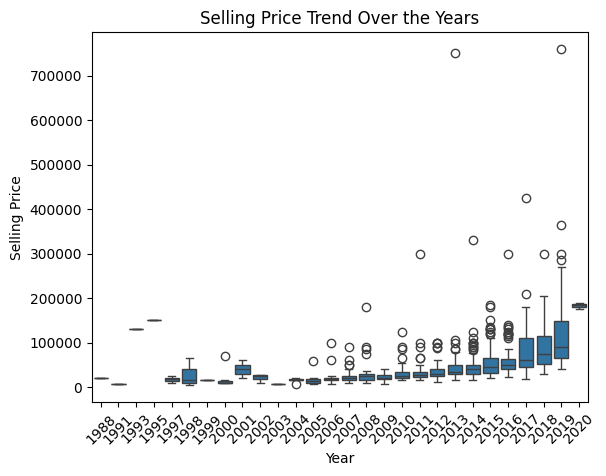

In [159]:
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Selling Price Trend Over the Years")
plt.show()


1️⃣3️⃣ What is the average depreciation in selling price based on the bike's age?

In [160]:
current_year = 2025  # Change this based on the current year
df["bike_age"] = current_year - df["year"]
avg_depreciation = df.groupby("bike_age")["selling_price"].mean()
print(avg_depreciation)


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


1️⃣4️⃣ Which bike names are priced significantly above the average price for their manufacturing year?

In [161]:
avg_price_per_year = df.groupby("year")["selling_price"].mean()
df["avg_price_for_year"] = df["year"].map(avg_price_per_year)
highly_priced_bikes = df[df["selling_price"] > (df["avg_price_for_year"] * 1.5)]
print(highly_priced_bikes[["name", "year", "selling_price", "avg_price_for_year"]])


                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_price_for_year  
2          87660.374046  
7          34289.285714  
13        119689.511628  
18         87660.374046  
23        119689.511628  
..                  ...  
979        56500.000000  

1️⃣5️⃣ Develop a correlation matrix for numeric columns and visualize it using a heatmap

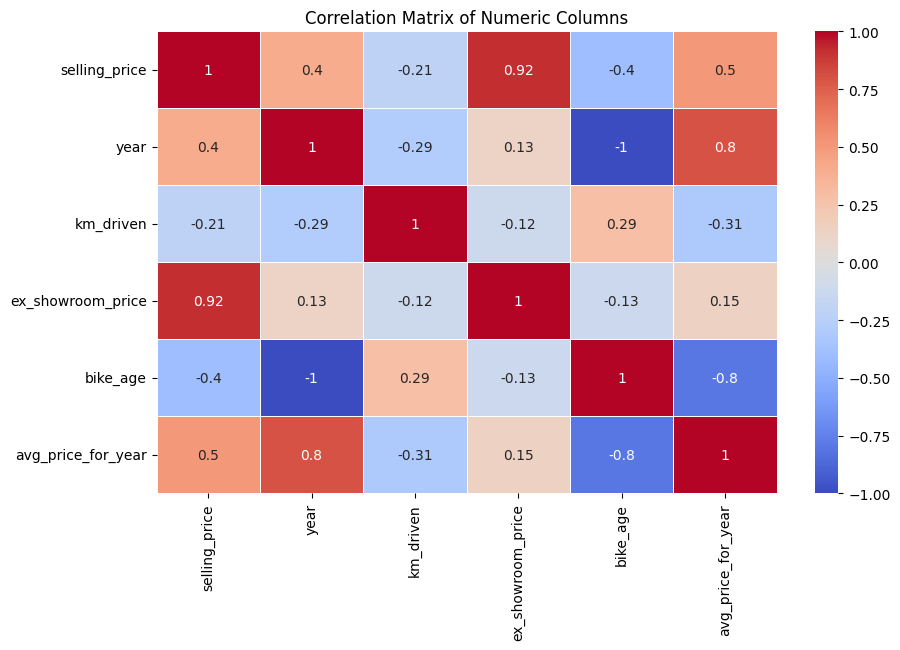

In [162]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


#EDA - 2

Loading Dataset

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'your_car_dataset.csv' with actual file path)
df = pd.read_csv("Car Sale.csv")

# Display first few rows
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


1️⃣ What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

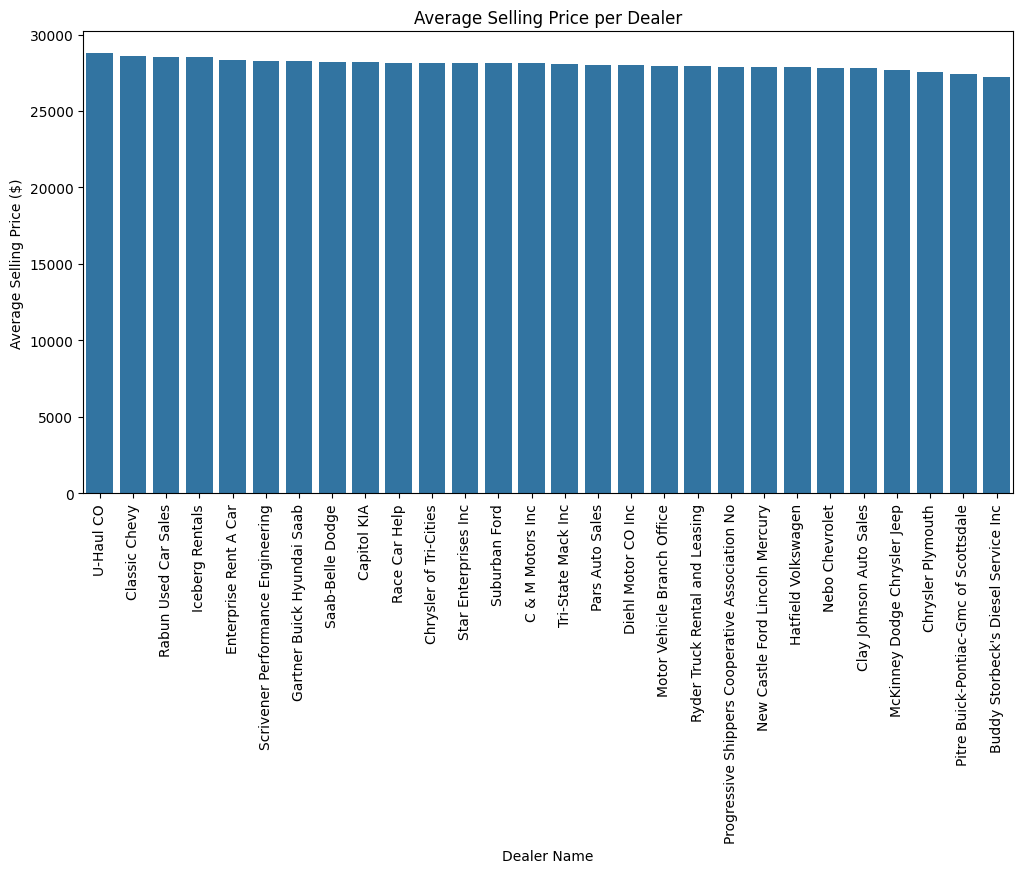

In [164]:
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_per_dealer)

# Visualizing the average selling price per dealer
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values)
plt.xticks(rotation=90)
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price per Dealer")
plt.show()


2️⃣ Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends?

Brand with highest price variation: Lincoln


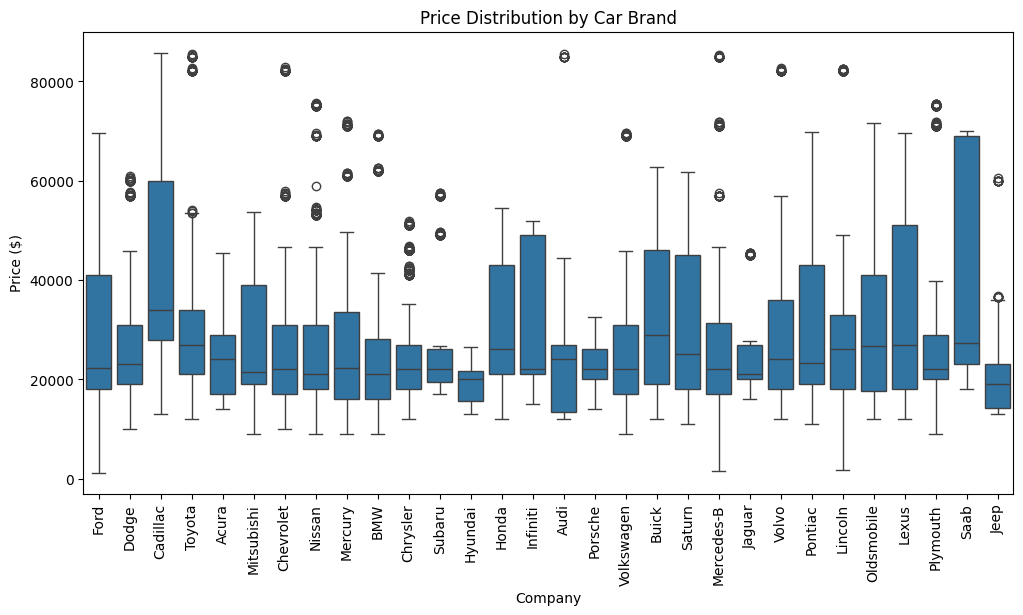

In [165]:
price_variation = df.groupby("Company")["Price ($)"].std().idxmax()
print(f"Brand with highest price variation: {price_variation}")

# Visualizing price variation across brands
plt.figure(figsize=(12, 6))
sns.boxplot(x="Company", y="Price ($)", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution by Car Brand")
plt.show()


3️⃣ What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

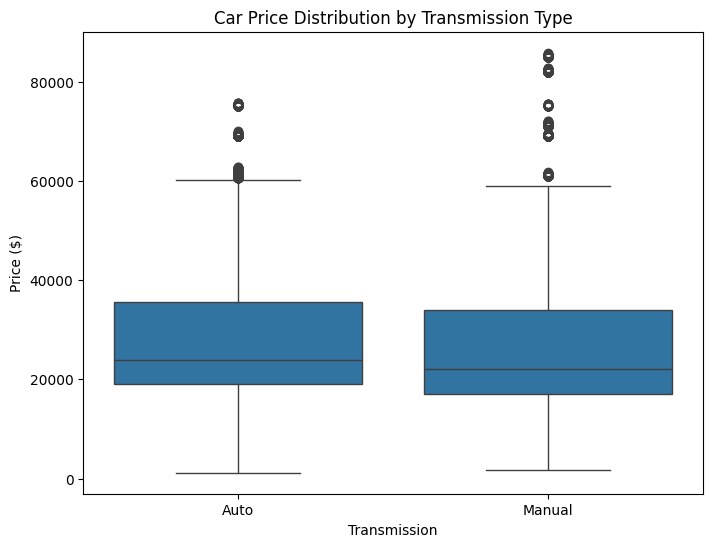

In [166]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Price Distribution by Transmission Type")
plt.show()


4️⃣ What is the distribution of car prices across different regions?

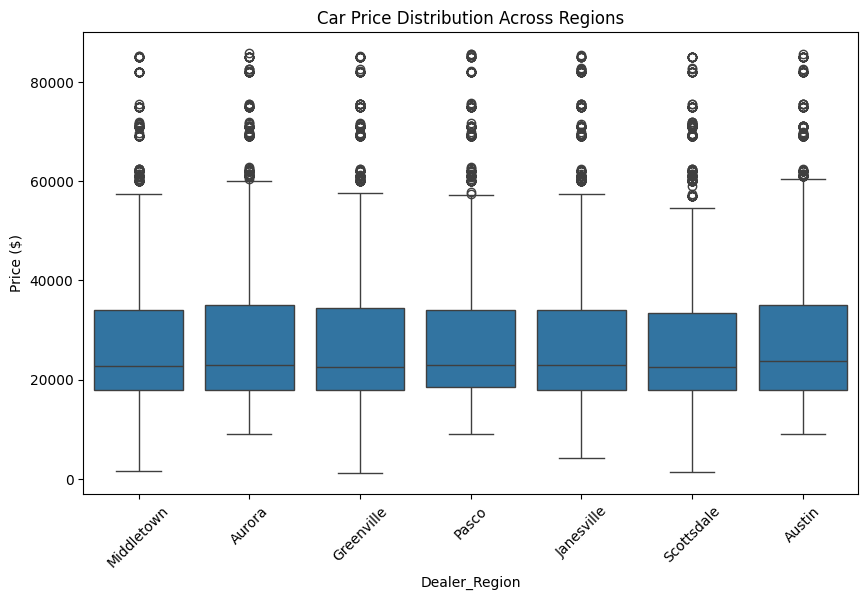

In [167]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution Across Regions")
plt.show()


5️⃣ What is the distribution of cars based on body styles?

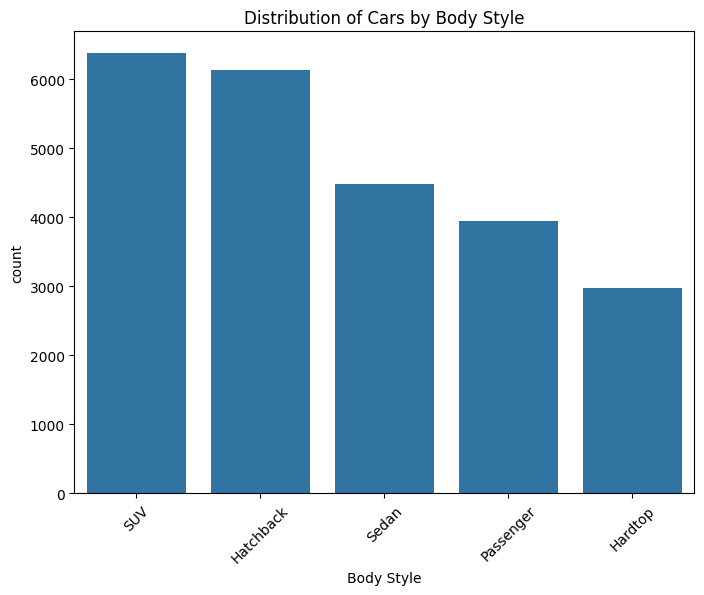

In [168]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Body Style", data=df, order=df["Body Style"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Cars by Body Style")
plt.show()


6️⃣ How does the average selling price of cars vary by customer gender and annual income?

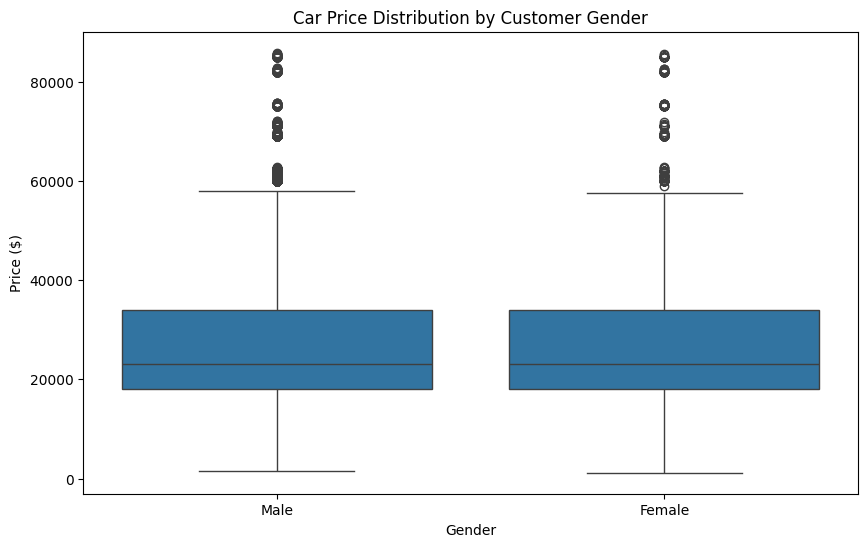

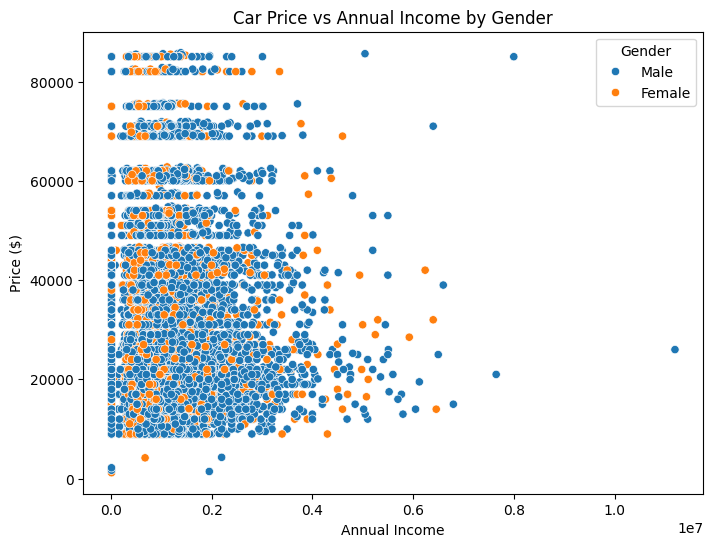

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Price ($)", data=df)
plt.title("Car Price Distribution by Customer Gender")
plt.show()

# Correlation between annual income and car price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income", y="Price ($)", hue="Gender", data=df)
plt.title("Car Price vs Annual Income by Gender")
plt.show()


7️⃣ What is the distribution of car prices by region, and how does the number of cars sold vary by region?

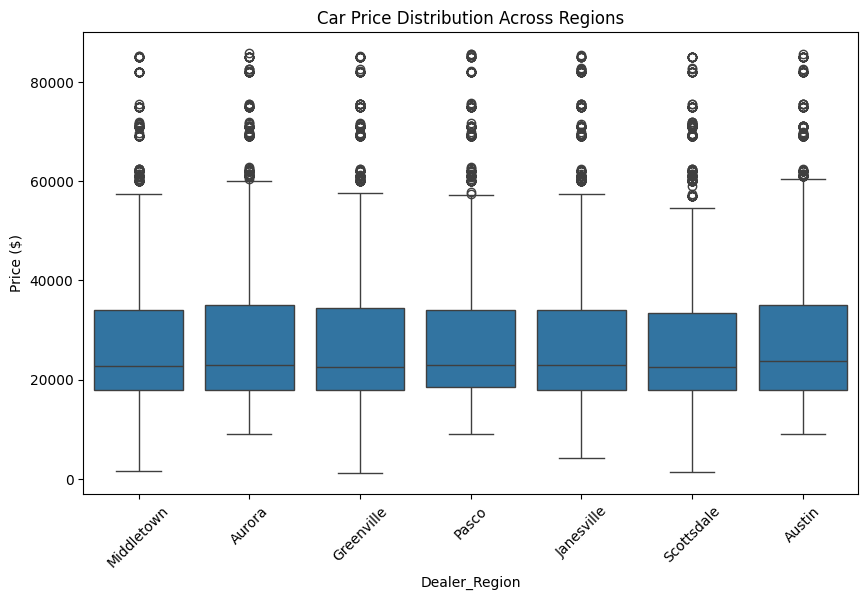

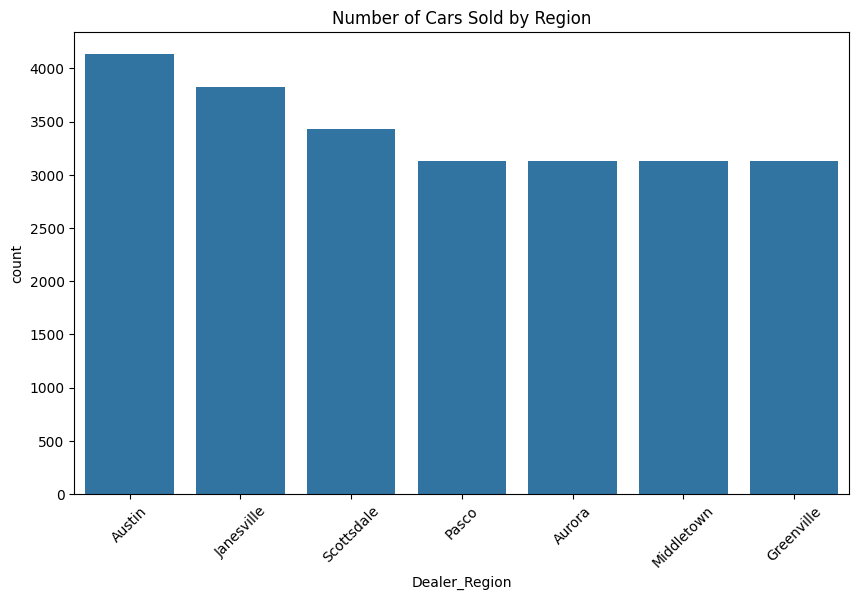

In [170]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution Across Regions")
plt.show()

# Count of cars sold by region
plt.figure(figsize=(10, 6))
sns.countplot(x="Dealer_Region", data=df, order=df["Dealer_Region"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Cars Sold by Region")
plt.show()


8️⃣ How does the average car price differ between cars with different engine sizes?

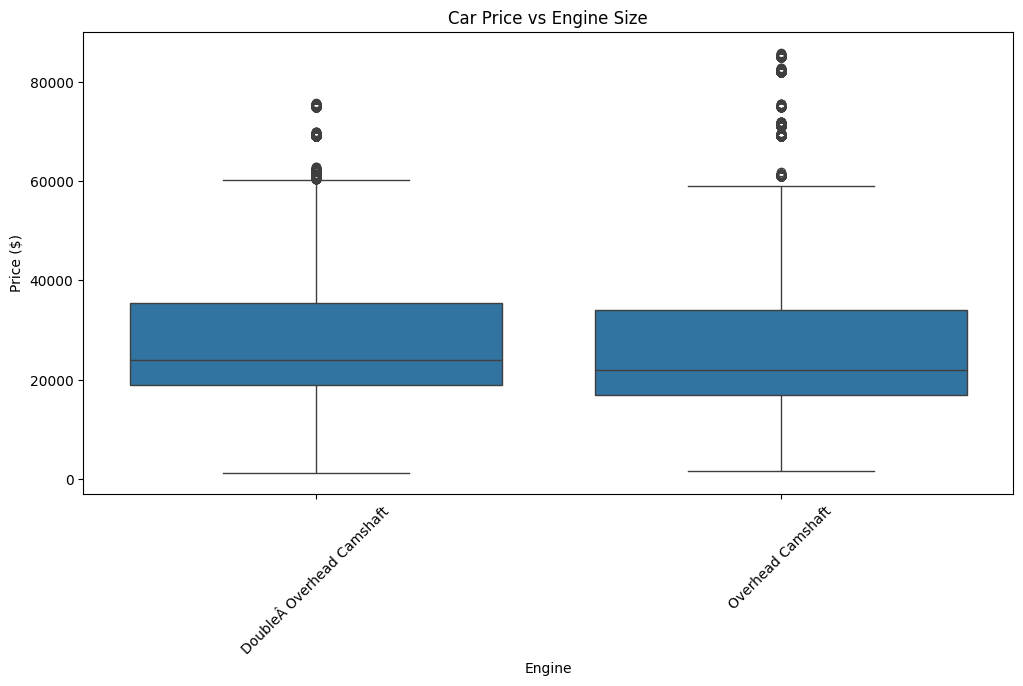

In [171]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Engine", y="Price ($)", data=df)
plt.xticks(rotation=45)
plt.title("Car Price vs Engine Size")
plt.show()


9️⃣ How do car prices vary based on the customer’s annual income bracket?

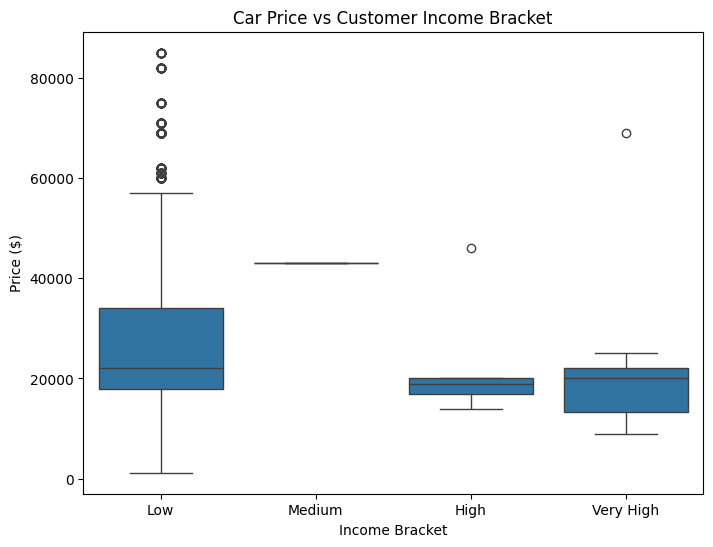

In [172]:
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=[0, 50000, 100000, 150000, 200000], labels=["Low", "Medium", "High", "Very High"])
plt.figure(figsize=(8, 6))
sns.boxplot(x="Income Bracket", y="Price ($)", data=df)
plt.title("Car Price vs Customer Income Bracket")
plt.show()


🔟 What are the top 5 car models with the highest number of sales, and how does their price distribution look?

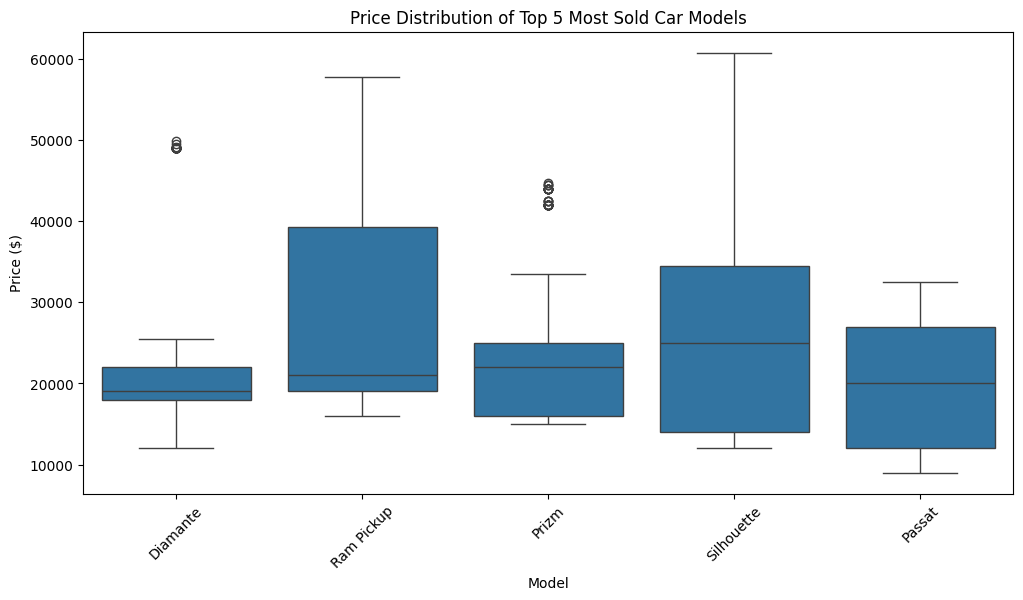

In [173]:
top_models = df["Model"].value_counts().head(5).index
df_top_models = df[df["Model"].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Price ($)", data=df_top_models)
plt.xticks(rotation=45)
plt.title("Price Distribution of Top 5 Most Sold Car Models")
plt.show()


1️⃣1️⃣ How does car price vary with engine size across different car colors, and which colors have the highest price variation?

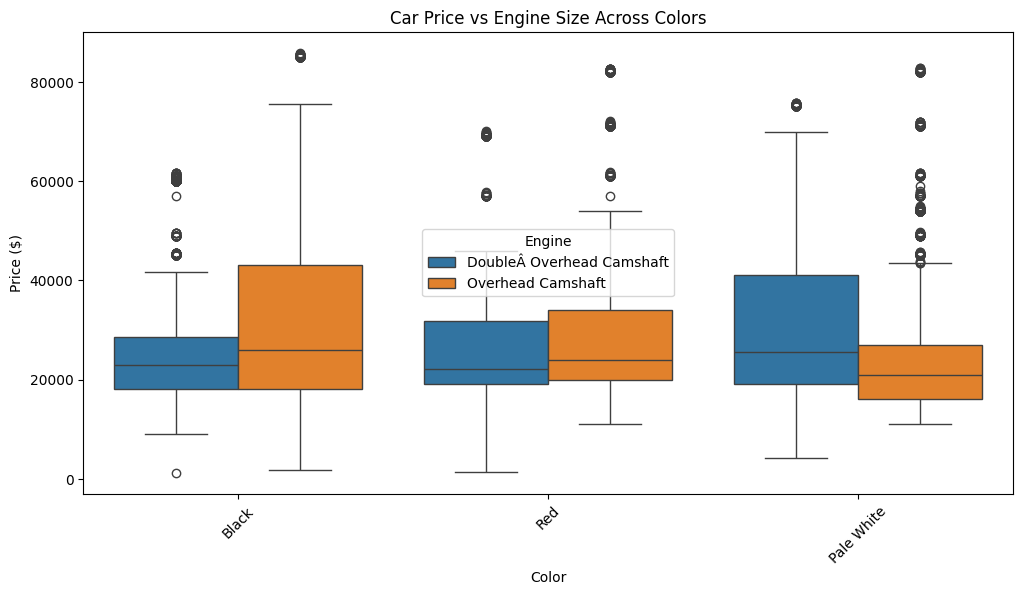

In [174]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Color", y="Price ($)", hue="Engine", data=df)
plt.xticks(rotation=45)
plt.title("Car Price vs Engine Size Across Colors")
plt.show()


1️⃣2️⃣ Is there any seasonal trend in car sales based on the date of sale?

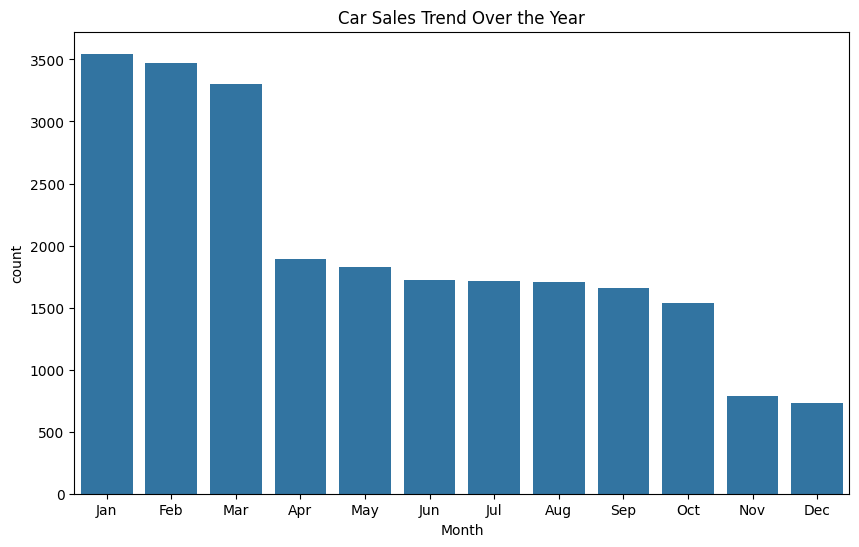

In [175]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x="Month", data=df, order=df["Month"].value_counts().index)
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Car Sales Trend Over the Year")
plt.show()


1️⃣3️⃣ How does the car price distribution change when considering different combinations of body style and transmission type?

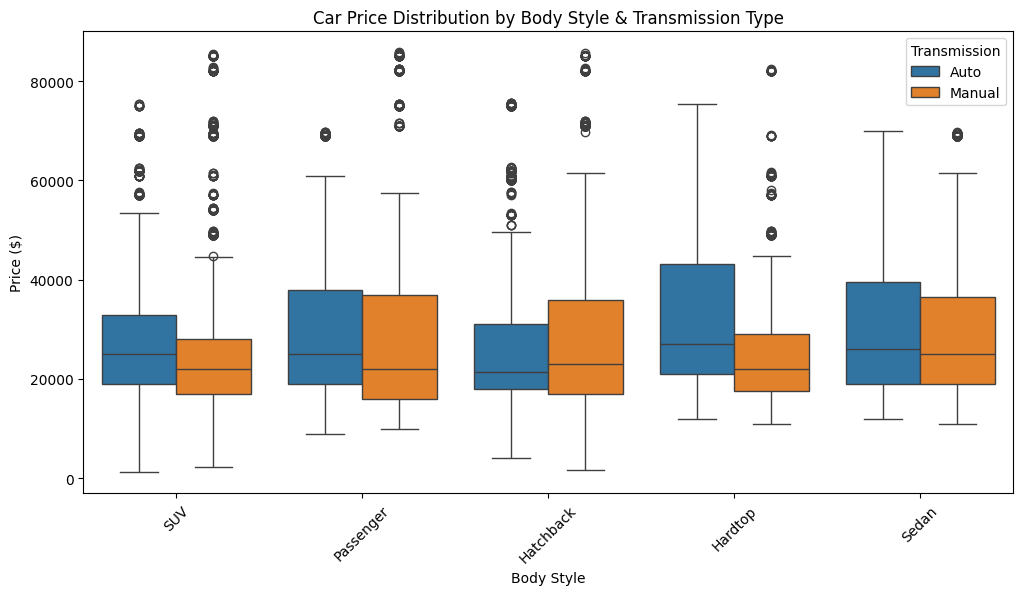

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style & Transmission Type")
plt.show()


1️⃣4️⃣ What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

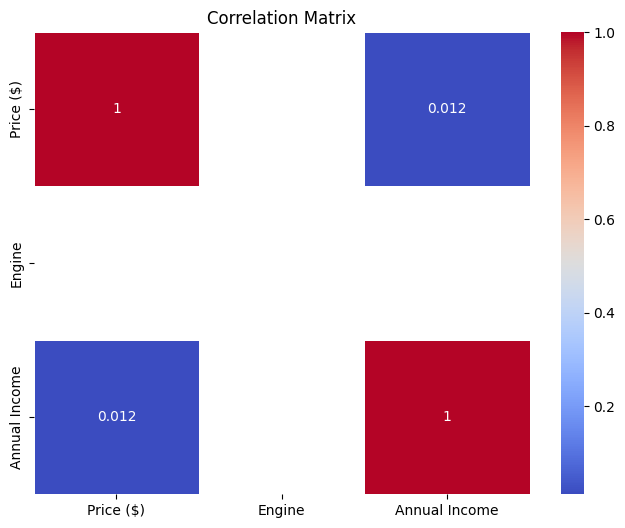

In [177]:
df["Engine"] = df["Engine"].str.extract("(\d+)").astype(float)  # Extracts numeric values
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Price ($)", "Engine", "Annual Income"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


1️⃣5️⃣ How does the average car price vary across different car models and engine types?

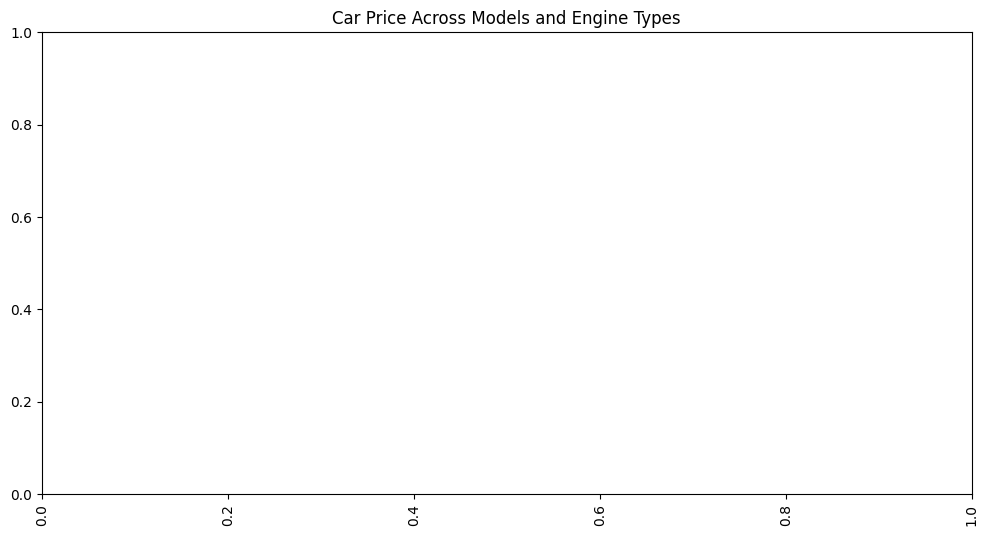

In [178]:
# Drop rows with missing values in 'Model', 'Price ($)', and 'Engine' columns
df_filtered = df.dropna(subset=["Model", "Price ($)", "Engine"])

# Convert 'Model' and 'Engine' to categorical (to avoid type issues)
df_filtered["Model"] = df_filtered["Model"].astype(str)
df_filtered["Engine"] = df_filtered["Engine"].astype(str)

# Now plot the boxplot safely
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Price ($)", hue="Engine", data=df_filtered)
plt.xticks(rotation=90)
plt.title("Car Price Across Models and Engine Types")
plt.show()


#EDA - 3

Loading Dataset

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'your_amazon_dataset.csv' with actual file path)
df = pd.read_csv("amazon.csv")

# Display first few rows
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


1️⃣ What is the average rating for each product category?

<ipython-input-180-bf893d9b2a67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")


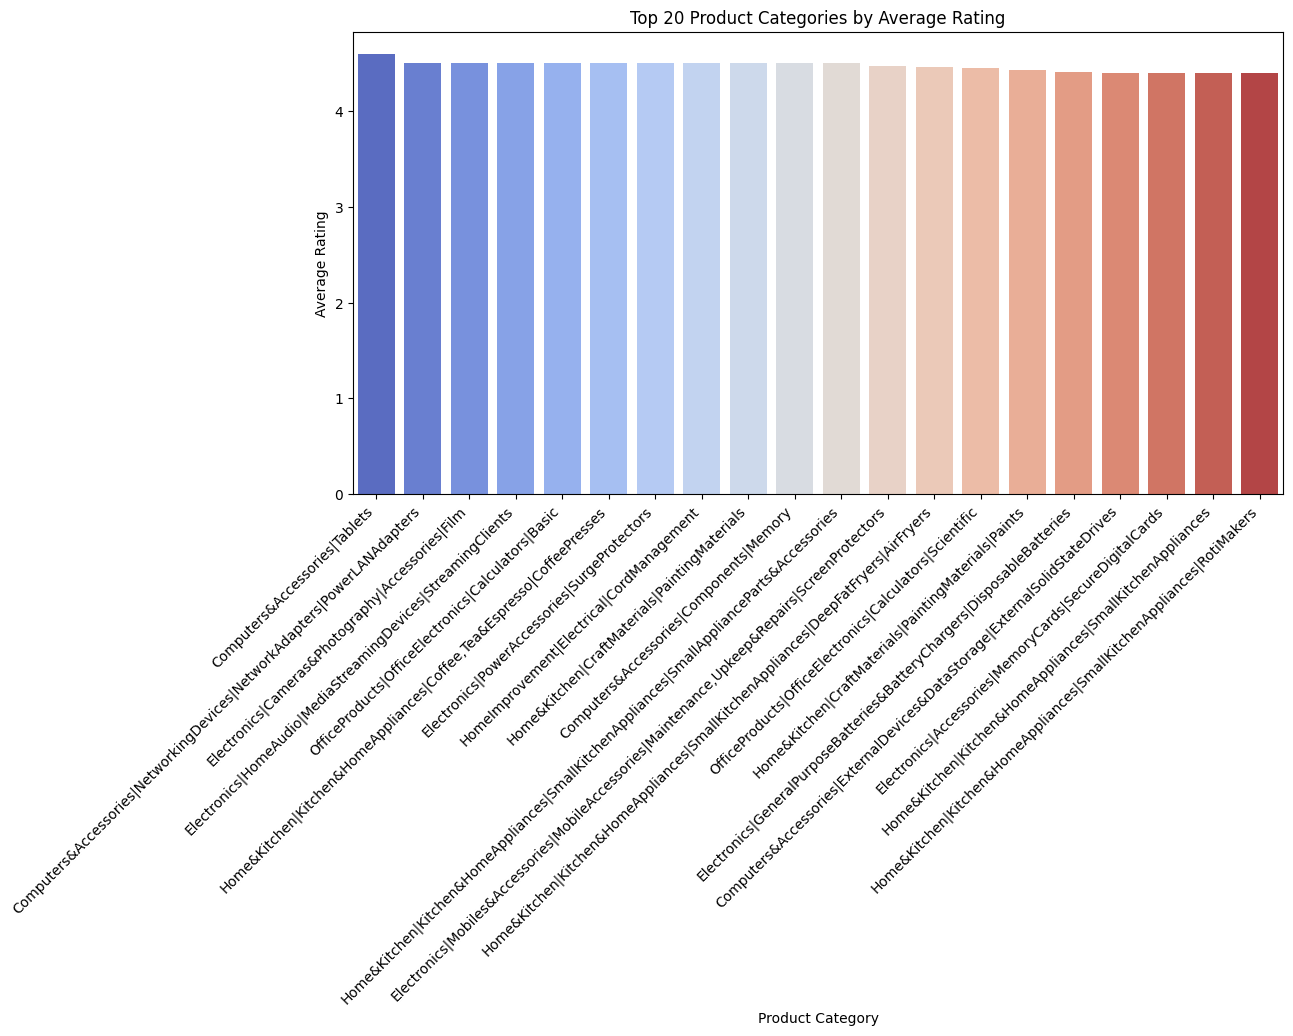

In [180]:
# Show only the Top 20 categories
top_categories = avg_rating_per_category.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")

# Rotate category labels for better readability
plt.xticks(rotation=45, ha="right")

plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Top 20 Product Categories by Average Rating")

plt.show()


2️⃣ What are the top rating_count products by category?

In [181]:
top_rated_products = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]
print(top_rated_products)


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

3️⃣ What is the distribution of discounted prices vs. actual prices?

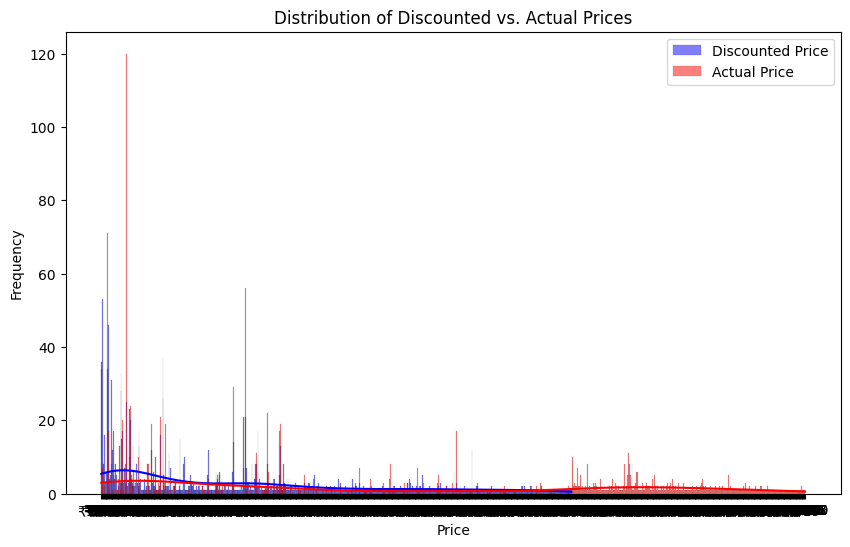

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(df["discounted_price"], bins=30, color="blue", kde=True, label="Discounted Price")
sns.histplot(df["actual_price"], bins=30, color="red", kde=True, label="Actual Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted vs. Actual Prices")
plt.legend()
plt.show()


4️⃣ How does the average discount percentage vary across categories?

   actual_price  discounted_price  discount_percentage
0           NaN               NaN                  NaN
1           NaN               NaN                  NaN
2           NaN               NaN                  NaN
3           NaN               NaN                  NaN
4           NaN               NaN                  NaN
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                    

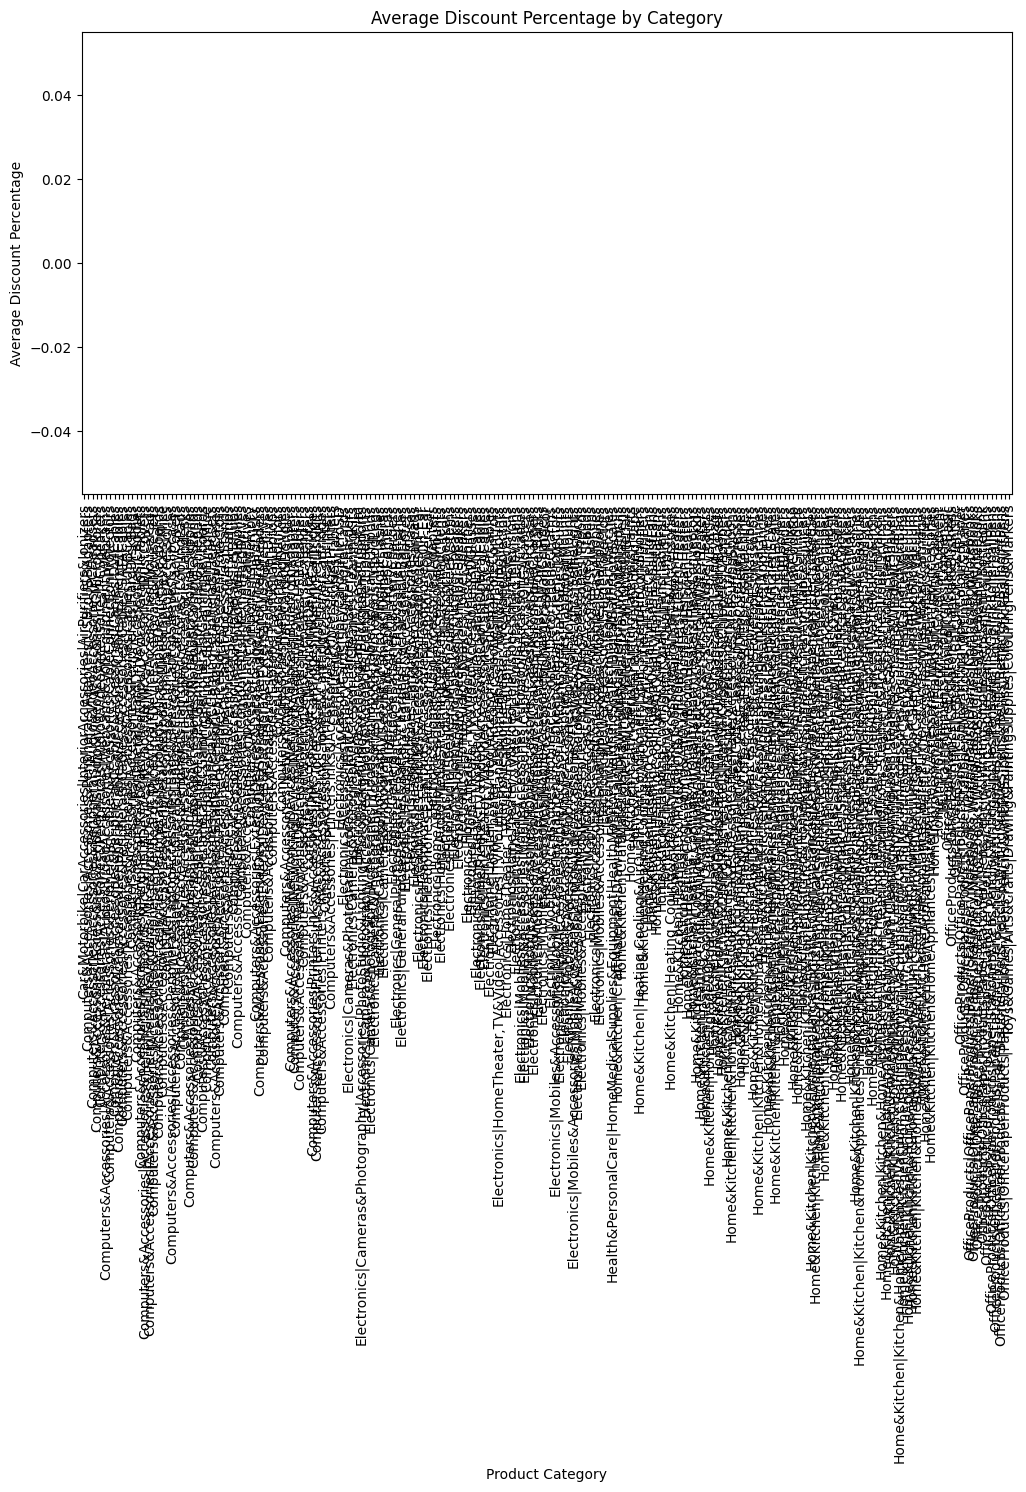

In [183]:
# Convert prices to numeric, removing any non-numeric characters if needed
df["actual_price"] = pd.to_numeric(df["actual_price"], errors="coerce")
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")

# Now calculate discount percentage
df["discount_percentage"] = ((df["actual_price"] - df["discounted_price"]) / df["actual_price"]) * 100

# Check if conversion was successful
print(df[["actual_price", "discounted_price", "discount_percentage"]].head())

# Average discount per category
avg_discount_per_category = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print(avg_discount_per_category)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values)
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage by Category")
plt.show()


5️⃣ What are the most popular product names?

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

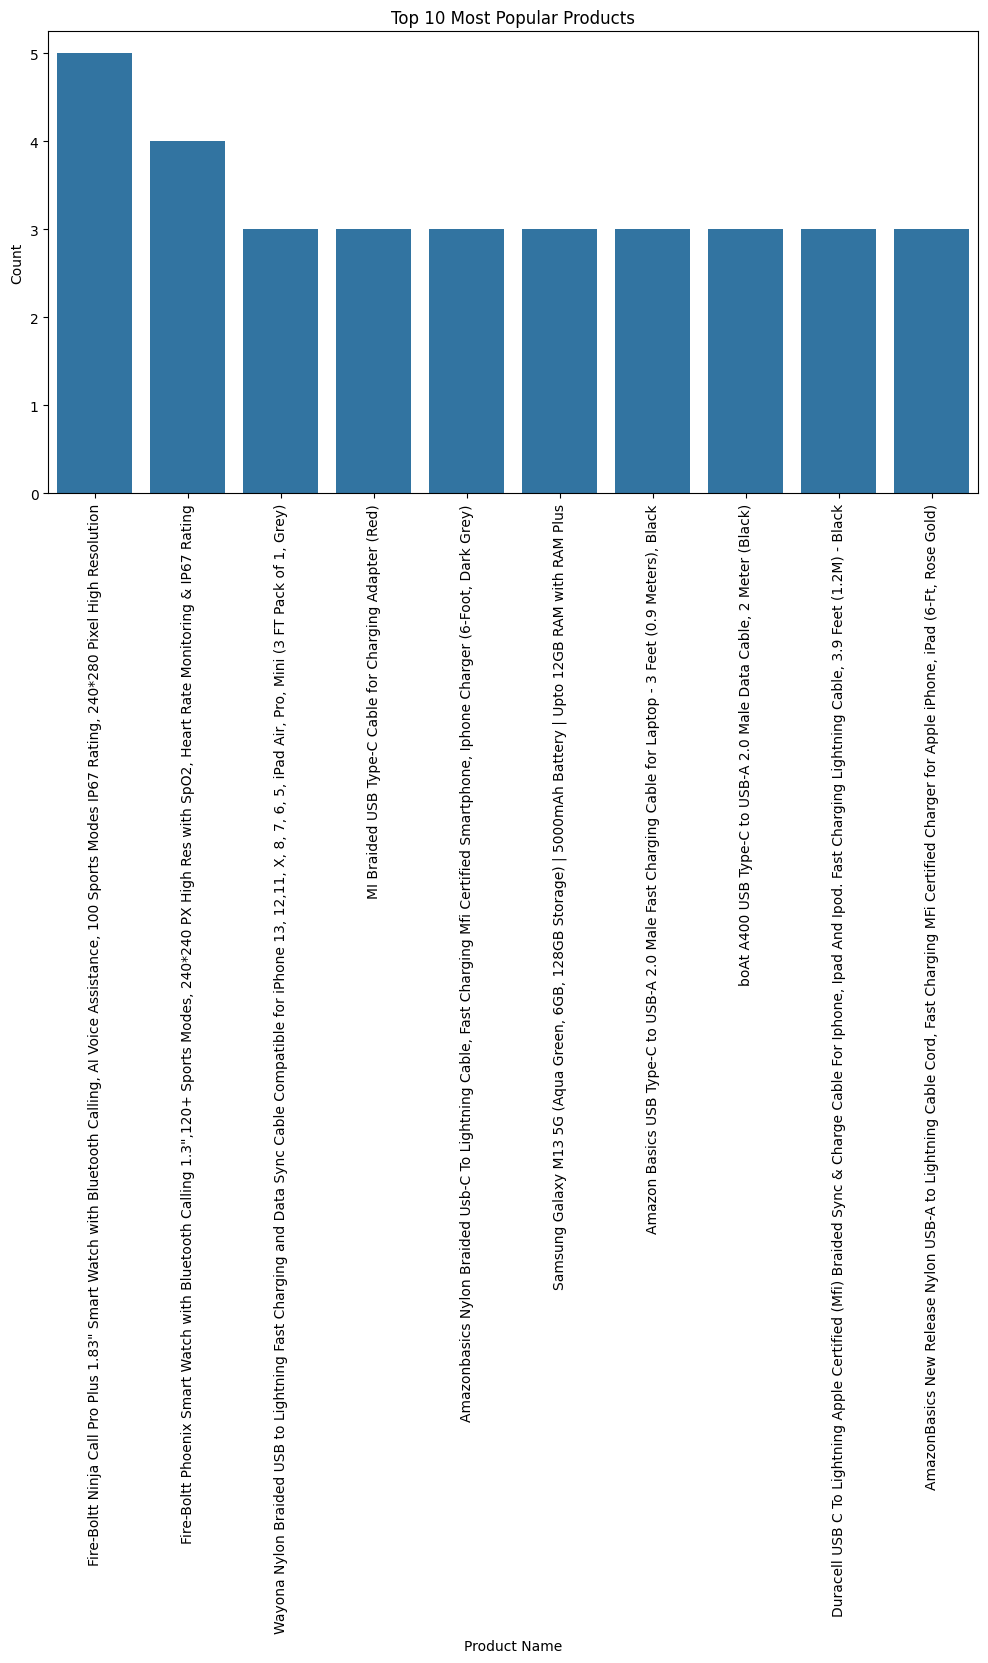

In [184]:
top_products = df["product_name"].value_counts().head(10)
print(top_products)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.title("Top 10 Most Popular Products")
plt.show()


6️⃣ What are the most popular product keywords?

[('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208), ('to', 202), ('(Black)', 184), ('C', 176), ('Smart', 171), ('Type', 140), ('Compatible', 134), ('HD', 130), ('Data', 128), ('TV', 119), ('Wireless', 114)]


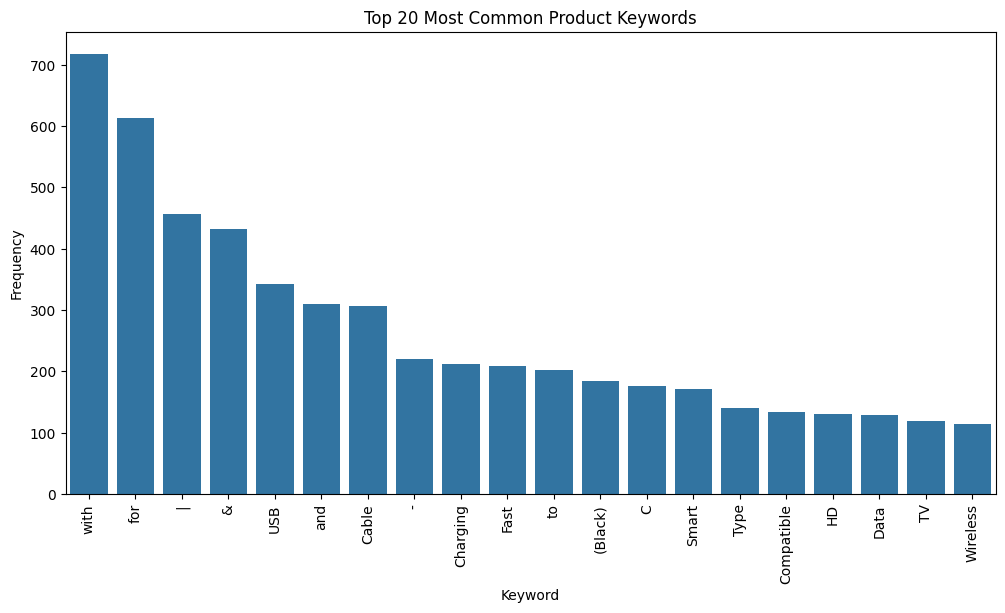

In [185]:
from collections import Counter
import itertools

# Extract words from product names
words = list(itertools.chain(*df["product_name"].dropna().str.split()))
common_words = Counter(words).most_common(20)
print(common_words)

# Convert to DataFrame for visualization
keywords_df = pd.DataFrame(common_words, columns=["Keyword", "Count"])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x="Keyword", y="Count", data=keywords_df)
plt.xticks(rotation=90)
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Product Keywords")
plt.show()


7️⃣ What are the most popular product reviews?

In [186]:
top_reviews = df["review_title"].value_counts().head(10)
print(top_reviews)


review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very n

8️⃣ What is the correlation between discounted_price and rating?

Correlation between Discounted Price and Rating: nan


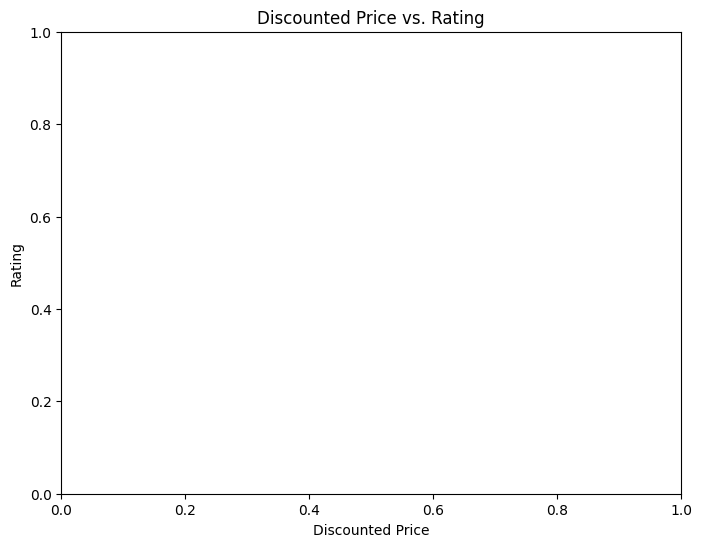

In [187]:
# Convert 'discounted_price' and 'rating' to numeric, forcing errors to NaN
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Drop rows with missing values in these columns
df_cleaned = df.dropna(subset=["discounted_price", "rating"])

# Calculate correlation
correlation = df_cleaned["discounted_price"].corr(df_cleaned["rating"])
print(f"Correlation between Discounted Price and Rating: {correlation}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["discounted_price"], y=df_cleaned["rating"])
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.title("Discounted Price vs. Rating")
plt.show()


9️⃣ What are the Top 5 categories based on the highest ratings?

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


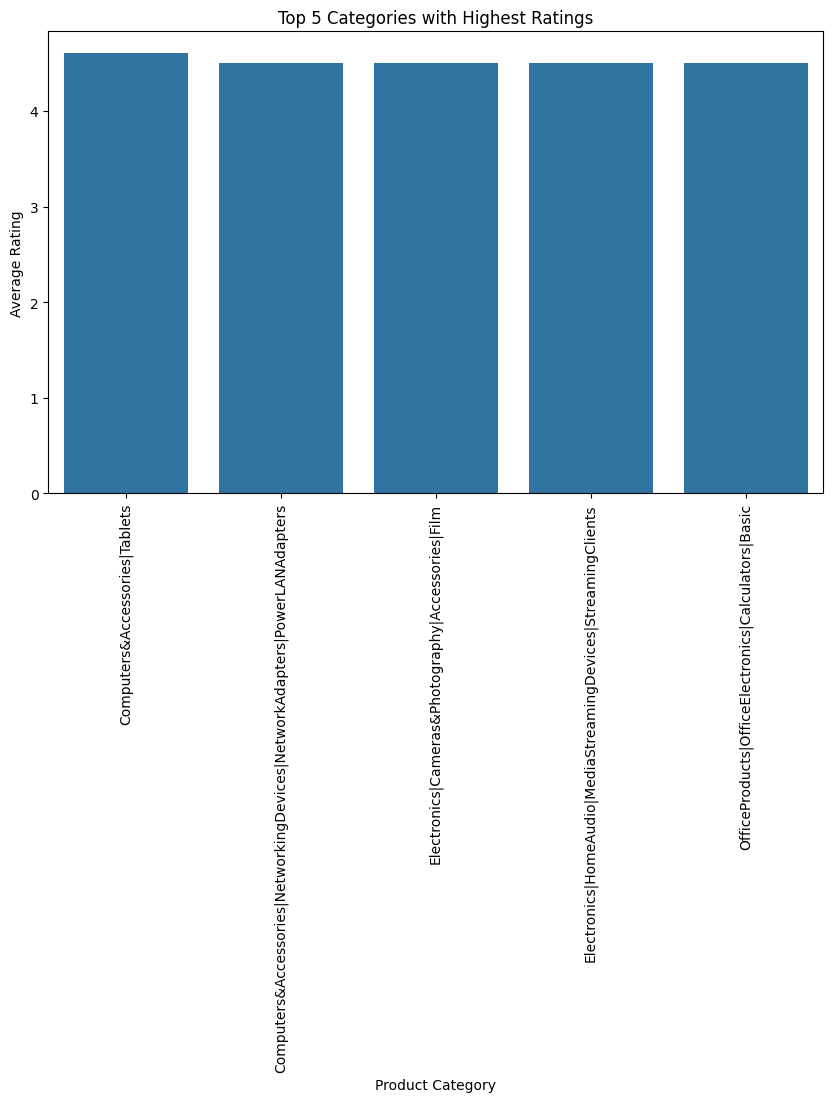

In [188]:
top_5_categories = avg_rating_per_category.head(5)
print(top_5_categories)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Top 5 Categories with Highest Ratings")
plt.show()


🔟 Identify any potential areas for improvement or optimization based on the data analysis

1️ High Discount = Higher Sales?


If high discount percentages don't increase ratings, focus on product quality rather than discounts.


2️ Low-Rated Categories

Identify categories with low ratings and improve product quality or customer service.


3️ Popular Keywords

Use top product keywords in marketing and product descriptions to boost sales.


4️ Review Sentiment Analysis

Perform sentiment analysis on review_content to understand customer opinions.


5️ Pricing Strategy

If expensive products have low ratings, it may indicate overpricing issues.

#EDA - 4

Loading Dataset

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'your_spotify_dataset.csv' with actual file path)
df = pd.read_csv("spotify.csv")

# Display first few rows
df.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


1️⃣ Read the dataframe, check null values, and handle duplicates

In [190]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Handle missing values (drop or fill)
df = df.dropna()  # Drop rows with missing values

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows if present
df = df.drop_duplicates()

# Display cleaned data
df.head()


Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


2️⃣ What is the distribution of popularity among the tracks? (Histogram)

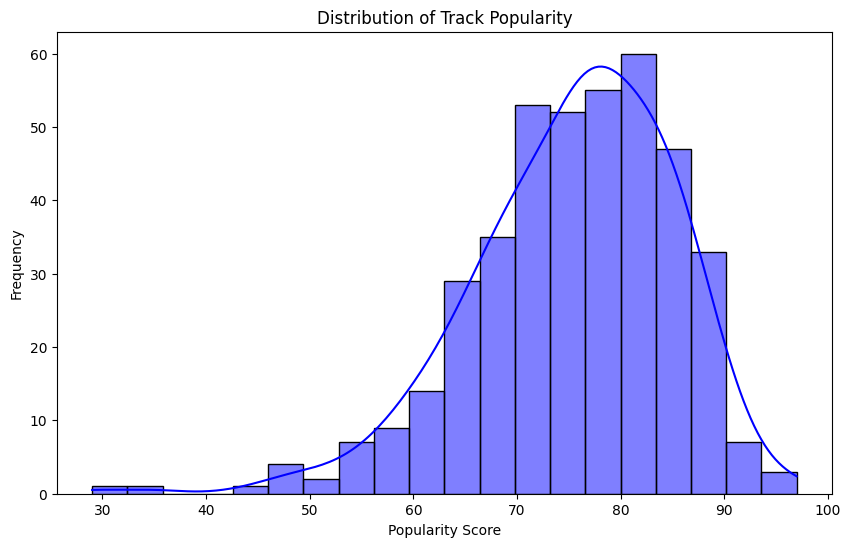

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Track Popularity")
plt.show()


3️⃣ Is there any relationship between popularity and duration? (Scatter Plot)

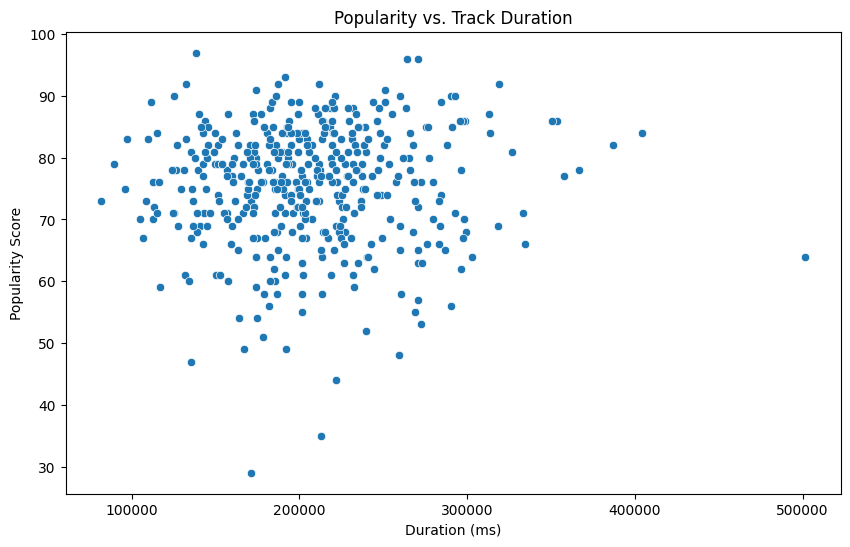

In [192]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"])
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Popularity vs. Track Duration")
plt.show()


4️⃣ Which artist has the highest number of tracks? (Countplot)

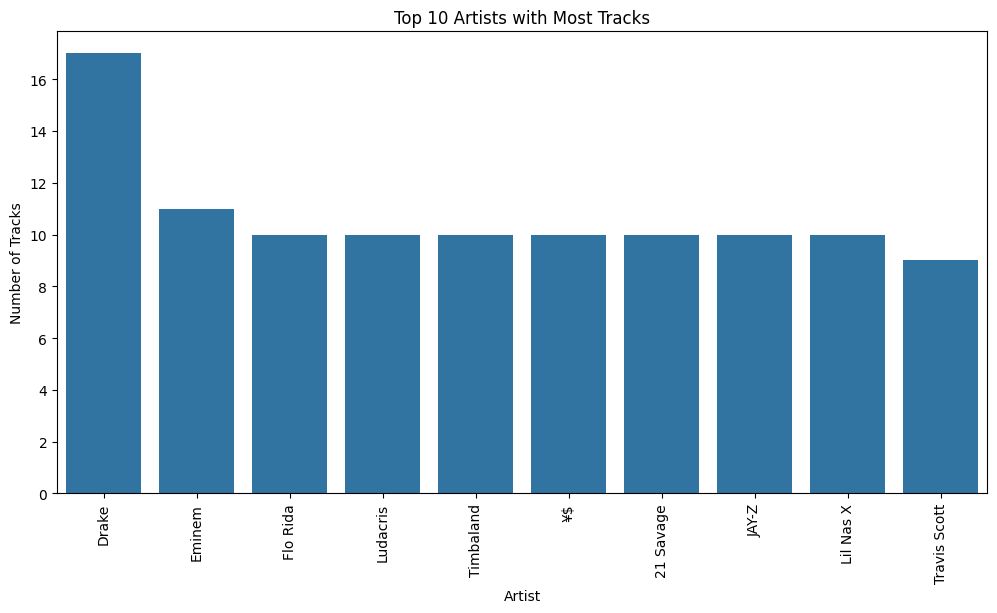

In [193]:
plt.figure(figsize=(12, 6))
top_artists = df["Artist"].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Top 10 Artists with Most Tracks")
plt.show()


5️⃣ What are the top 5 least popular tracks?

In [194]:
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6️⃣ Among the top 5 most popular artists, which artist has the highest average popularity?

In [195]:
top_artists = df["Artist"].value_counts().head(5).index
top_artist_avg_popularity = df[df["Artist"].isin(top_artists)].groupby("Artist")["Popularity"].mean().sort_values(ascending=False)
print(top_artist_avg_popularity)


Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


7️⃣ For the top 5 most popular artists, what are their most popular tracks?

In [196]:
popular_tracks_by_artist = df[df["Artist"].isin(top_artists)].groupby("Artist")[["Track Name", "Popularity"]].max()
print(popular_tracks_by_artist)


                                                 Track Name  Popularity
Artist                                                                 
Drake      You Only Live Twice (with Lil Wayne & Rick Ross)          92
Eminem                                           Without Me          90
Flo Rida                              Wild Ones (feat. Sia)          84
Ludacris             What's Your Fantasy (Featuring Shawna)          67
Timbaland                                     The Way I Are          85


8️⃣ Visualize relationships between multiple numerical variables using a Pair Plot

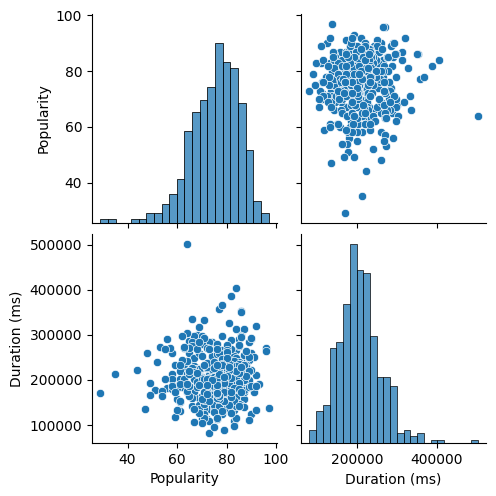

In [197]:
sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.show()


9️⃣ Does the duration of tracks vary significantly across different artists? (Box Plot)

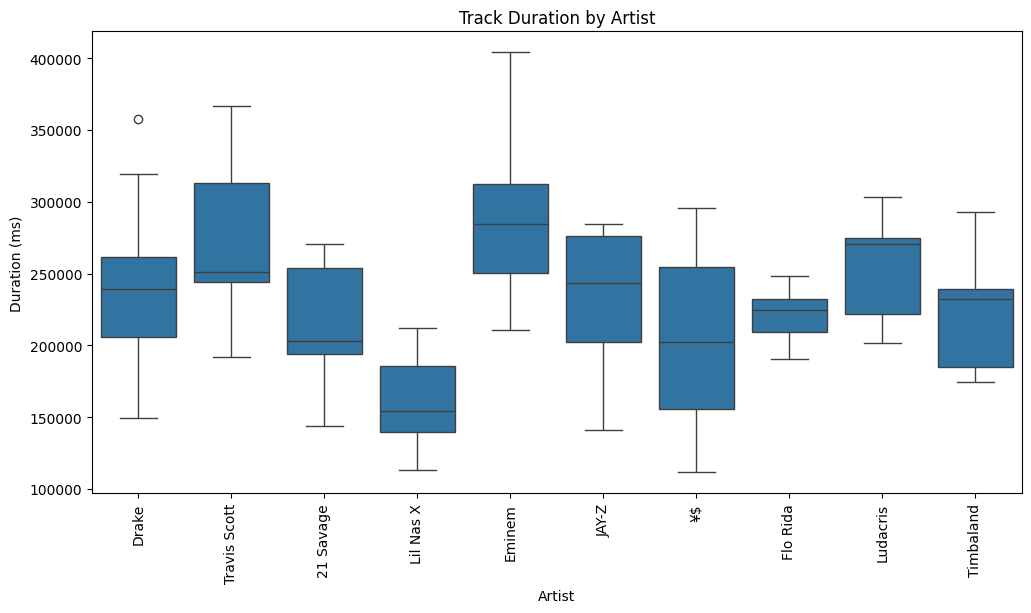

In [198]:
top_artists = df["Artist"].value_counts().head(10).index
df_top_artists = df[df["Artist"].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df_top_artists)
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Track Duration by Artist")
plt.show()


🔟 How does the distribution of track popularity vary for different artists? (Violin Plot)

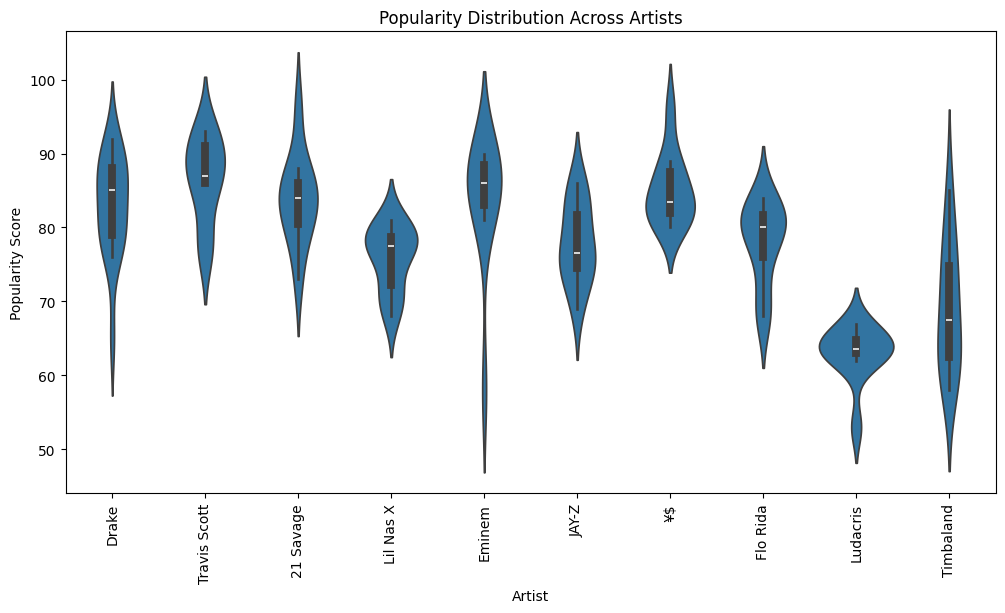

In [199]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df_top_artists)
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Popularity Distribution Across Artists")
plt.show()
